<a href="https://colab.research.google.com/github/SachinBorgave09/Decision-Trees-with-Tree-Visualization/blob/master/Decision_Trees_with_Tree_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EDA/Dataset/kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### **EDA**

We'll just check out a simple pairplot for this small dataset.


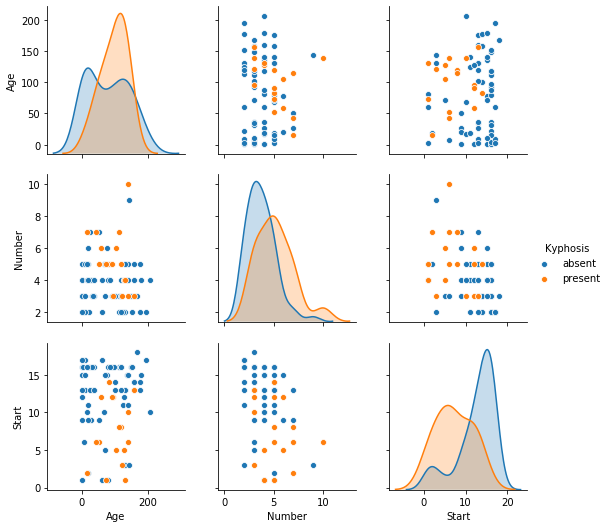

In [6]:
sns.pairplot(df,hue='Kyphosis')

### **Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### **Decision Trees**

We'll start just by training a single decision tree.

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Prediction and Evaluation**

In [0]:
predictions = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [0]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [16]:
conf_matrix,accuracy

(array([[15,  8],
        [ 0,  2]]), 0.68)

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.65      0.79        23
     present       0.20      1.00      0.33         2

    accuracy                           0.68        25
   macro avg       0.60      0.83      0.56        25
weighted avg       0.94      0.68      0.75        25



In [18]:
print(confusion_matrix(y_test,predictions))

[[15  8]
 [ 0  2]]



### **Tree Visualization**

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:


In [19]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Age', 'Number', 'Start']

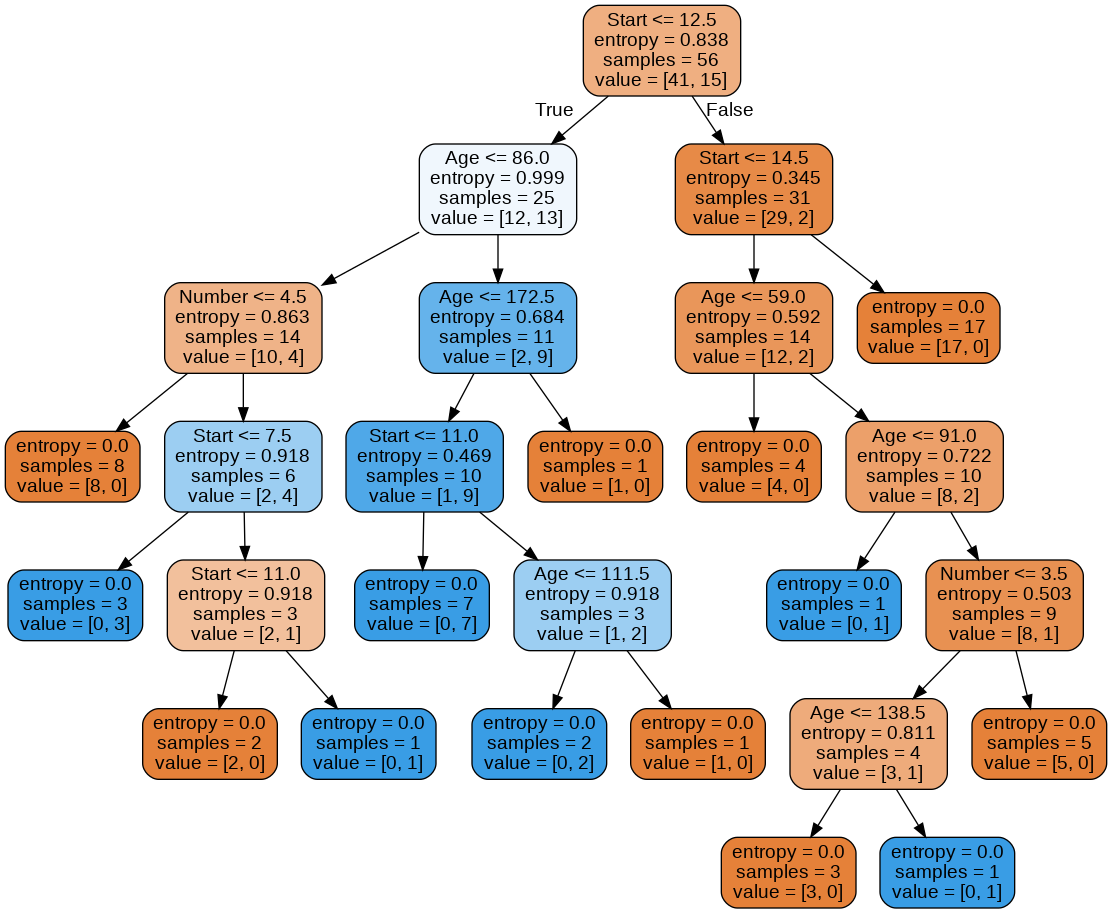

In [20]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

### **Great Job!**